In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Đọc dữ liệu của bảng sinh viên**

In [3]:
df_admission = pd.read_csv("Data/admission.csv")
df_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30217 entries, 0 to 30216
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MA_SO_SV         30217 non-null  object 
 1   NAM_TUYENSINH    30217 non-null  int64  
 2   PTXT             30217 non-null  object 
 3   TOHOP_XT         30217 non-null  object 
 4   DIEM_TRUNGTUYEN  30217 non-null  float64
 5   DIEM_CHUAN       30217 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


In [4]:
df_admission.duplicated().sum()

0

**Đọc dữ liệu bảng học tập**

In [6]:
df_academic_records = pd.read_csv("Data/academic_records.csv")
df_academic_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105726 entries, 0 to 105725
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   MA_SO_SV      105726 non-null  object 
 1   HOC_KY        105726 non-null  object 
 2   CPA           105726 non-null  float64
 3   GPA           105726 non-null  float64
 4   TC_DANGKY     105726 non-null  int64  
 5   TC_HOANTHANH  105726 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ MB


In [7]:
df_academic_records.describe()

,CPA,GPA,TC_DANGKY,TC_HOANTHANH
count,105726.000000,105726.000000,105726.000000,105726.000000
mean,1.962662,2.290328,19.438492,15.609916
std,0.899984,0.479314,5.584857,6.610703
min,0.000000,0.000000,1.000000,0.000000
25%,1.360000,1.980000,17.000000,12.000000
50%,2.000000,2.250000,20.000000,16.000000
75%,2.600000,2.570000,22.000000,20.000000
max,4.080000,4.080000,71.000000,65.000000


**Gộp 2 bảng lại với nhau**

In [9]:
df_full = df_academic_records.merge(df_admission, how="left", on="MA_SO_SV")
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105726 entries, 0 to 105725
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MA_SO_SV         105726 non-null  object 
 1   HOC_KY           105726 non-null  object 
 2   CPA              105726 non-null  float64
 3   GPA              105726 non-null  float64
 4   TC_DANGKY        105726 non-null  int64  
 5   TC_HOANTHANH     105726 non-null  int64  
 6   NAM_TUYENSINH    105726 non-null  int64  
 7   PTXT             105726 non-null  object 
 8   TOHOP_XT         105726 non-null  object 
 9   DIEM_TRUNGTUYEN  105726 non-null  float64
 10  DIEM_CHUAN       105726 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 8.9+ MB


In [10]:
df_full.head()

,MA_SO_SV,HOC_KY,CPA,GPA,TC_DANGKY,TC_HOANTHANH,NAM_TUYENSINH,PTXT,TOHOP_XT,DIEM_TRUNGTUYEN,DIEM_CHUAN
0,f022ed8d1ac1,HK2 2020-2021,2.19,2.02,18,18,2020,1,A00,23.96,21.72
1,f022ed8d1ac1,HK1 2022-2023,0.95,2.12,14,7,2020,1,A00,23.96,21.72
2,f022ed8d1ac1,HK1 2023-2024,0.81,1.89,29,16,2020,1,A00,23.96,21.72
3,f022ed8d1ac1,HK2 2022-2023,1.37,1.93,26,23,2020,1,A00,23.96,21.72
4,f022ed8d1ac1,HK2 2023-2024,1.71,1.91,16,13,2020,1,A00,23.96,21.72


In [11]:
df_full.duplicated().sum()

24

In [12]:
df_full.drop_duplicates(keep = 'first', inplace= True)

In [13]:
df_full["TI_LE_HOAN_THANH"] =  df_full["TC_HOANTHANH"] / df_full["TC_DANGKY"]

In [14]:
def layNamHoc(x):
    return x.split(" ")[1].split("-")[0]
def layHocKi(x):
    return x.split(" ")[0][-1]

In [15]:

df_full["NAM_HOC"] = df_full["HOC_KY"].apply( lambda x : f"{layNamHoc(x)}").astype(int)
df_full["SO_HOC_KY"] = df_full["HOC_KY"].apply( lambda x : f"{layHocKi(x)}").astype(int)
df_full["SO_HOC_KY"] = (df_full["NAM_HOC"] - df_full["NAM_TUYENSINH"])*2  + df_full["SO_HOC_KY"]
df_full["KHOANG_CACH_TRUNG_TUYEN"] = df_full["DIEM_TRUNGTUYEN"] - df_full["DIEM_CHUAN"]

In [16]:
df_full.info()


<class 'pandas.core.frame.DataFrame'>
Index: 105702 entries, 0 to 105725
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MA_SO_SV                 105702 non-null  object 
 1   HOC_KY                   105702 non-null  object 
 2   CPA                      105702 non-null  float64
 3   GPA                      105702 non-null  float64
 4   TC_DANGKY                105702 non-null  int64  
 5   TC_HOANTHANH             105702 non-null  int64  
 6   NAM_TUYENSINH            105702 non-null  int64  
 7   PTXT                     105702 non-null  object 
 8   TOHOP_XT                 105702 non-null  object 
 9   DIEM_TRUNGTUYEN          105702 non-null  float64
 10  DIEM_CHUAN               105702 non-null  float64
 11  TI_LE_HOAN_THANH         105702 non-null  float64
 12  NAM_HOC                  105702 non-null  int32  
 13  SO_HOC_KY                105702 non-null  int64  
 14  KHOANG_CA

In [17]:
df_full.head()

,MA_SO_SV,HOC_KY,CPA,GPA,TC_DANGKY,TC_HOANTHANH,NAM_TUYENSINH,PTXT,TOHOP_XT,DIEM_TRUNGTUYEN,DIEM_CHUAN,TI_LE_HOAN_THANH,NAM_HOC,SO_HOC_KY,KHOANG_CACH_TRUNG_TUYEN
0,f022ed8d1ac1,HK2 2020-2021,2.19,2.02,18,18,2020,1,A00,23.96,21.72,1.000000,2020,2,2.24
1,f022ed8d1ac1,HK1 2022-2023,0.95,2.12,14,7,2020,1,A00,23.96,21.72,0.500000,2022,5,2.24
2,f022ed8d1ac1,HK1 2023-2024,0.81,1.89,29,16,2020,1,A00,23.96,21.72,0.551724,2023,7,2.24
3,f022ed8d1ac1,HK2 2022-2023,1.37,1.93,26,23,2020,1,A00,23.96,21.72,0.884615,2022,6,2.24
4,f022ed8d1ac1,HK2 2023-2024,1.71,1.91,16,13,2020,1,A00,23.96,21.72,0.812500,2023,8,2.24


In [18]:
df_full["NAM_TUYENSINH"].value_counts().sort_index()

NAM_TUYENSINH
2018    16737
2019    21292
2020    24975
2021    21381
2022    14192
2023     7125
Name: count, dtype: int64

In [19]:
df_full.describe()

,CPA,GPA,TC_DANGKY,TC_HOANTHANH,NAM_TUYENSINH,DIEM_TRUNGTUYEN,DIEM_CHUAN,TI_LE_HOAN_THANH,NAM_HOC,SO_HOC_KY,KHOANG_CACH_TRUNG_TUYEN
count,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000
mean,1.962646,2.290318,19.438204,15.609591,2020.154907,22.044500,20.020546,0.803579,2021.719636,4.614378,2.023955
std,0.899974,0.479302,5.585337,6.610654,1.468610,2.651235,2.963702,0.259950,1.076476,2.660478,1.792214
min,0.000000,0.000000,1.000000,0.000000,2018.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,0.000000
25%,1.360000,1.980000,17.000000,12.000000,2019.000000,20.160000,17.570000,0.705882,2021.000000,2.000000,0.640000
50%,2.000000,2.250000,20.000000,16.000000,2020.000000,22.380000,19.800000,0.900000,2022.000000,4.000000,1.530000
75%,2.600000,2.570000,22.000000,20.000000,2021.000000,24.080000,22.200000,1.000000,2023.000000,6.000000,2.940000
max,4.080000,4.080000,71.000000,65.000000,2023.000000,59.060000,50.880000,1.000000,2023.000000,12.000000,10.900000


In [20]:
# Xử lý ngoại lai CPA , GPA > 4.0
df_full.loc[df_full['GPA'] > 4, 'GPA'] = 4
df_full.loc[df_full['CPA'] > 4, 'CPA'] = 4


In [21]:
df_full.describe()


,CPA,GPA,TC_DANGKY,TC_HOANTHANH,NAM_TUYENSINH,DIEM_TRUNGTUYEN,DIEM_CHUAN,TI_LE_HOAN_THANH,NAM_HOC,SO_HOC_KY,KHOANG_CACH_TRUNG_TUYEN
count,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000,105702.000000
mean,1.962450,2.290285,19.438204,15.609591,2020.154907,22.044500,20.020546,0.803579,2021.719636,4.614378,2.023955
std,0.899524,0.479183,5.585337,6.610654,1.468610,2.651235,2.963702,0.259950,1.076476,2.660478,1.792214
min,0.000000,0.000000,1.000000,0.000000,2018.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,0.000000
25%,1.360000,1.980000,17.000000,12.000000,2019.000000,20.160000,17.570000,0.705882,2021.000000,2.000000,0.640000
50%,2.000000,2.250000,20.000000,16.000000,2020.000000,22.380000,19.800000,0.900000,2022.000000,4.000000,1.530000
75%,2.600000,2.570000,22.000000,20.000000,2021.000000,24.080000,22.200000,1.000000,2023.000000,6.000000,2.940000
max,4.000000,4.000000,71.000000,65.000000,2023.000000,59.060000,50.880000,1.000000,2023.000000,12.000000,10.900000


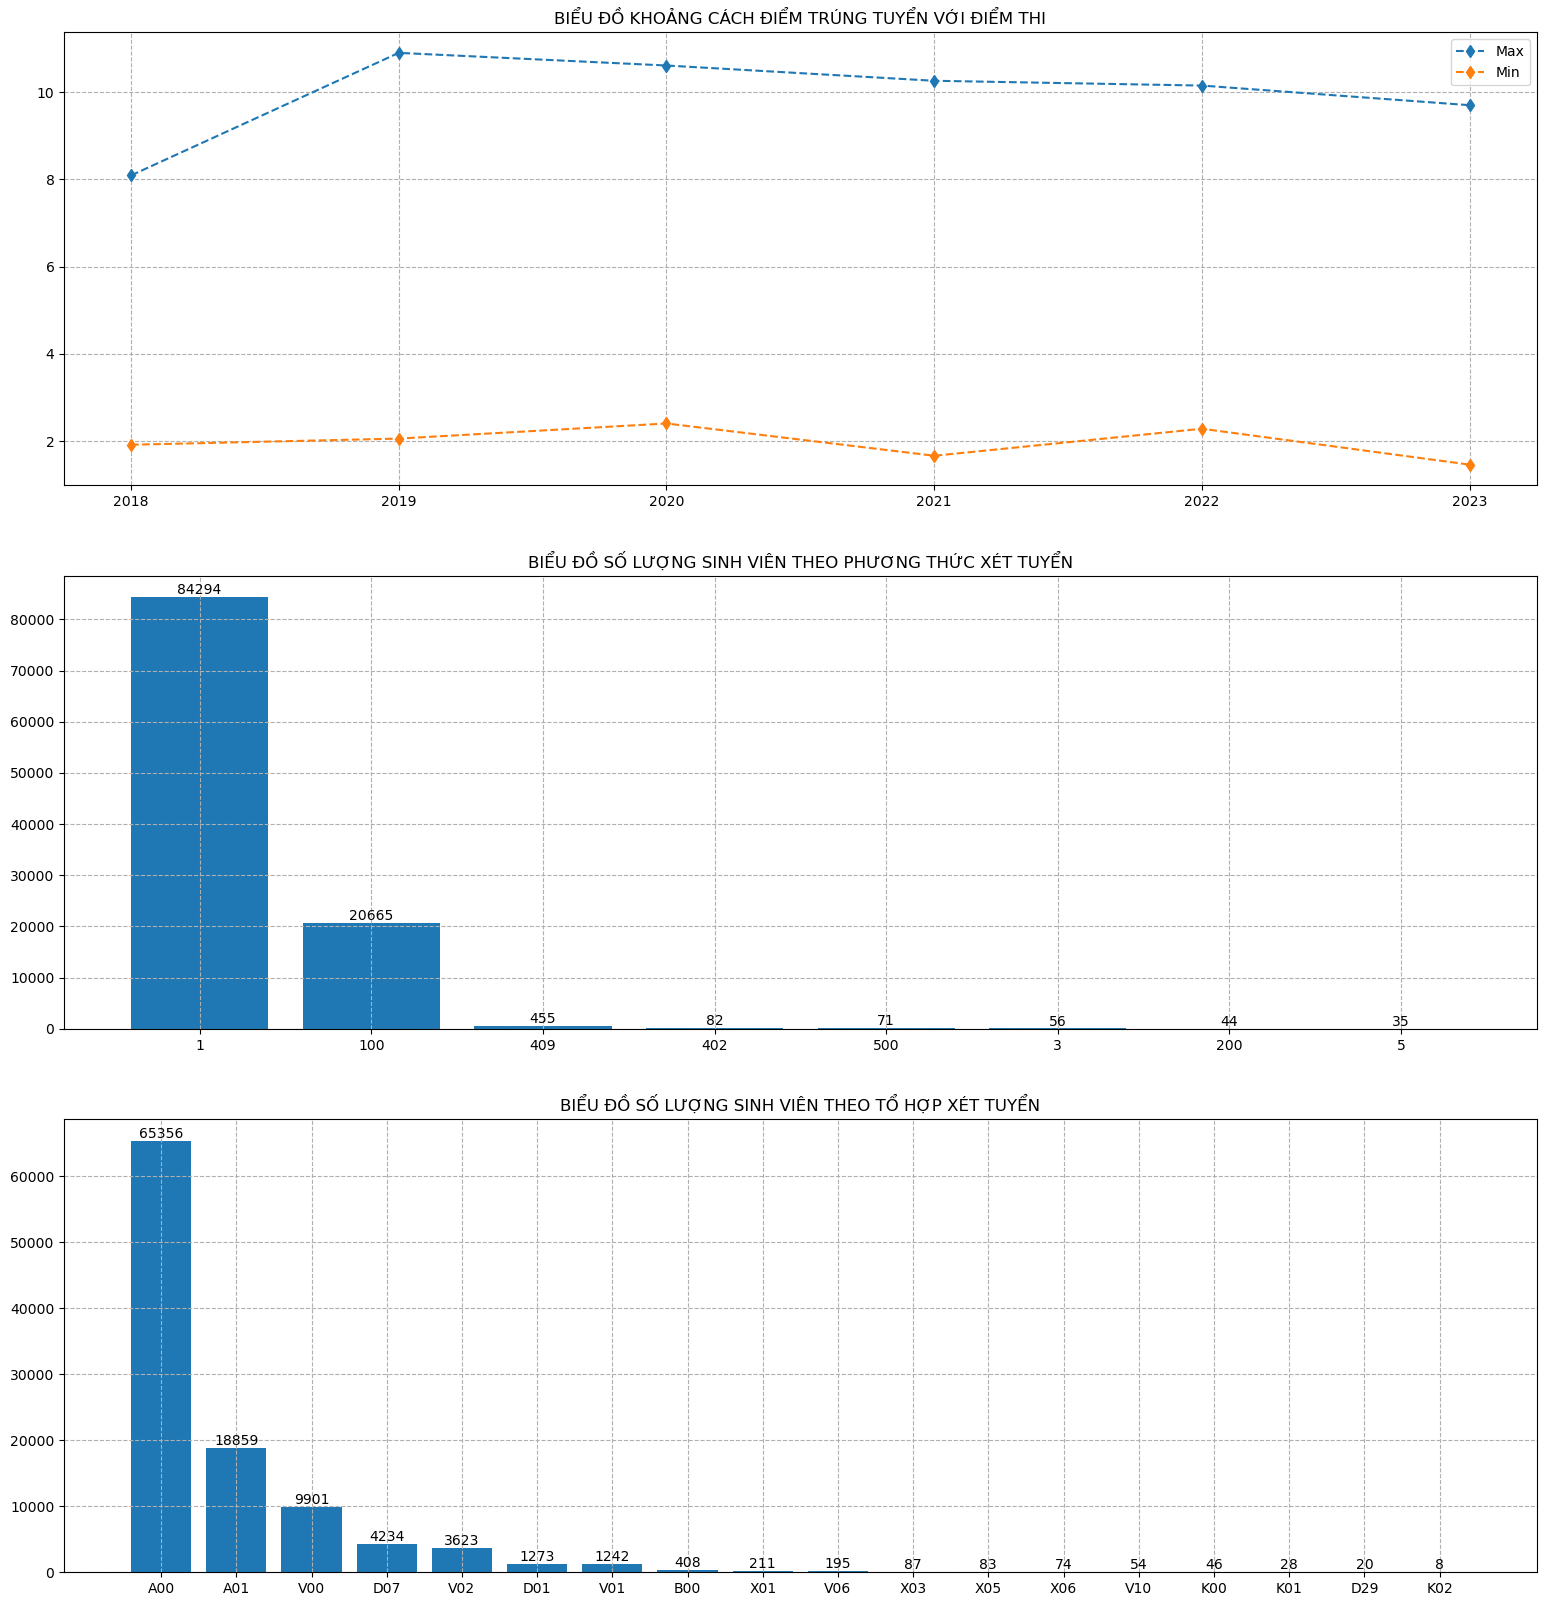

In [22]:
plt.figure(figsize=(19, 20))
plt.subplot(3,1,1)
plt.plot(
     df_full.groupby("NAM_TUYENSINH")["KHOANG_CACH_TRUNG_TUYEN"].max().index,
     df_full.groupby("NAM_TUYENSINH")["KHOANG_CACH_TRUNG_TUYEN"].max().values,
    linestyle = "--",
    marker = 'd',
    label = "Max"
)
plt.plot(
     df_full.groupby("NAM_TUYENSINH")["KHOANG_CACH_TRUNG_TUYEN"].mean().index,
     df_full.groupby("NAM_TUYENSINH")["KHOANG_CACH_TRUNG_TUYEN"].mean().values,
    linestyle = "--",
    marker = 'd',
    label = "Min"
    
)
plt.grid(ls = "--")
plt.title("BIỂU ĐỒ KHOẢNG CÁCH ĐIỂM TRÚNG TUYỂN VỚI ĐIỂM THI")
plt.legend()


plt.subplot(3,1,2)
bar_PTXT = plt.bar(
   df_full["PTXT"].value_counts().index,
    df_full["PTXT"].value_counts().values,
)

for bar in bar_PTXT:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.0f}',
        ha='center', va='bottom'
    )
plt.grid(ls = "--")
plt.title("BIỂU ĐỒ SỐ LƯỢNG SINH VIÊN THEO PHƯƠNG THỨC XÉT TUYỂN")


plt.subplot(3,1,3)
bar_TOHOP_XT = plt.bar(
   df_full["TOHOP_XT"].value_counts().index,
    df_full["TOHOP_XT"].value_counts().values,
)

for bar in bar_TOHOP_XT:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.0f}',
        ha='center', va='bottom'
    )

plt.grid(ls = "--")
plt.title("BIỂU ĐỒ SỐ LƯỢNG SINH VIÊN THEO TỔ HỢP XÉT TUYỂN")


plt.show()

In [23]:
df_full["PTXT"].value_counts()

PTXT
1      84294
100    20665
409      455
402       82
500       71
3         56
200       44
5         35
Name: count, dtype: int64

In [24]:
df_admission["PTXT"].value_counts()

PTXT
1          13712
100        11922
200         4201
402          193
409          142
500           20
3             11
5              9
417            3
303            2
402_SPT        1
415            1
Name: count, dtype: int64

# CHIA TẬP DỮ LIỆU THÀNH CÁC NĂM NHẬP HỌC

In [26]:
#vẼ BIỀU ĐỒ CẦN THIẾT
def veBieuDo(data):
    plt.figure(figsize=(15,6))

    demSinhVienTungHocKi = data.groupby("SO_HOC_KY")["TI_LE_HOAN_THANH"].mean()
    print("Tỉ lệ qua môn:")
    print(demSinhVienTungHocKi)
    plt.subplot(2,2,1)
    plt.plot(
        demSinhVienTungHocKi.index,
        demSinhVienTungHocKi.values,
        linestyle = "--",
        marker = 'd'
    )
    plt.grid(ls = "--")
    plt.title("TỈ LỆ HOÀN THÀNH MÔN TRUNG BÌNH CỦA SINH VIÊN THEO KÌ HỌC")

    luongSinhVienTungHocKi = data.groupby("SO_HOC_KY")["TI_LE_HOAN_THANH"].count()
    print("Lượng sinh viên:")
    print(luongSinhVienTungHocKi)
    
    plt.subplot(2,2,2)
    plt.plot(
        luongSinhVienTungHocKi.index,
        luongSinhVienTungHocKi.values,
        linestyle = "--",
        marker = 'd',
        c = "red"
    )
    plt.grid(ls = "--")
    plt.title("LƯỢNG SINH VIÊN THEO KÌ HỌC")


    luongSinhVienTungHocKi = data.groupby("SO_HOC_KY")["TI_LE_HOAN_THANH"].count()
    print("Lượng sinh viên:")
    print(luongSinhVienTungHocKi)
    
    plt.subplot(2,2,2)
    plt.plot(
        luongSinhVienTungHocKi.index,
        luongSinhVienTungHocKi.values,
        linestyle = "--",
        marker = 'd',
        c = "red"
    )
    plt.grid(ls = "--")
    plt.title("LƯỢNG SINH VIÊN THEO TỪNG KÌ HỌC")

    
    plt.show()




## Năm 2018

In [28]:
df_2018 = df_full[df_full["NAM_TUYENSINH"] == 2018]
df_2018["HOC_KY"].value_counts()

HOC_KY
HK2 2020-2021    2837
HK1 2020-2021    2833
HK1 2021-2022    2745
HK2 2021-2022    2681
HK1 2022-2023    2552
HK2 2022-2023    1743
HK1 2023-2024     791
HK2 2023-2024     555
Name: count, dtype: int64

Tỉ lệ qua môn:
SO_HOC_KY
5     0.786454
6     0.803597
7     0.854185
8     0.824725
9     0.835215
10    0.827392
11    0.670088
12    0.644704
Name: TI_LE_HOAN_THANH, dtype: float64
Lượng sinh viên:
SO_HOC_KY
5     2833
6     2837
7     2745
8     2681
9     2552
10    1743
11     791
12     555
Name: TI_LE_HOAN_THANH, dtype: int64
Lượng sinh viên:
SO_HOC_KY
5     2833
6     2837
7     2745
8     2681
9     2552
10    1743
11     791
12     555
Name: TI_LE_HOAN_THANH, dtype: int64


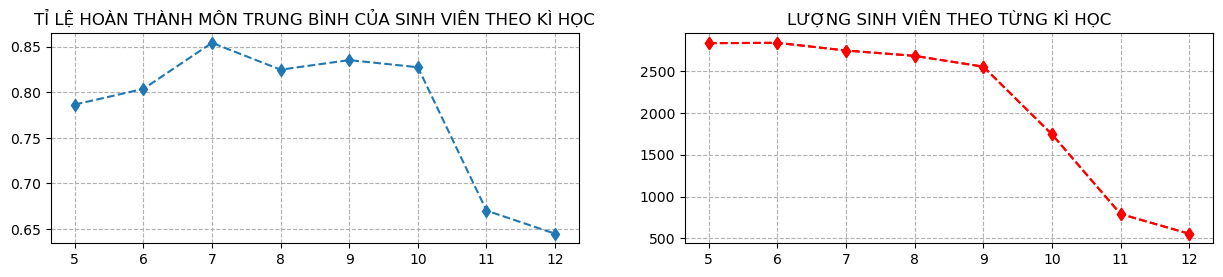

In [29]:
veBieuDo(df_2018)

## Năm 2019

In [31]:
df_2019 = df_full[df_full["NAM_TUYENSINH"] == 2019]
df_2019["HOC_KY"].value_counts()

HOC_KY
HK1 2020-2021    2987
HK2 2020-2021    2964
HK1 2021-2022    2926
HK2 2021-2022    2861
HK1 2022-2023    2754
HK2 2022-2023    2681
HK1 2023-2024    2527
HK2 2023-2024    1592
Name: count, dtype: int64

Tỉ lệ qua môn:
SO_HOC_KY
3     0.743905
4     0.814659
5     0.854046
6     0.777250
7     0.796474
8     0.844661
9     0.832847
10    0.774280
Name: TI_LE_HOAN_THANH, dtype: float64
Lượng sinh viên:
SO_HOC_KY
3     2987
4     2964
5     2926
6     2861
7     2754
8     2681
9     2527
10    1592
Name: TI_LE_HOAN_THANH, dtype: int64
Lượng sinh viên:
SO_HOC_KY
3     2987
4     2964
5     2926
6     2861
7     2754
8     2681
9     2527
10    1592
Name: TI_LE_HOAN_THANH, dtype: int64


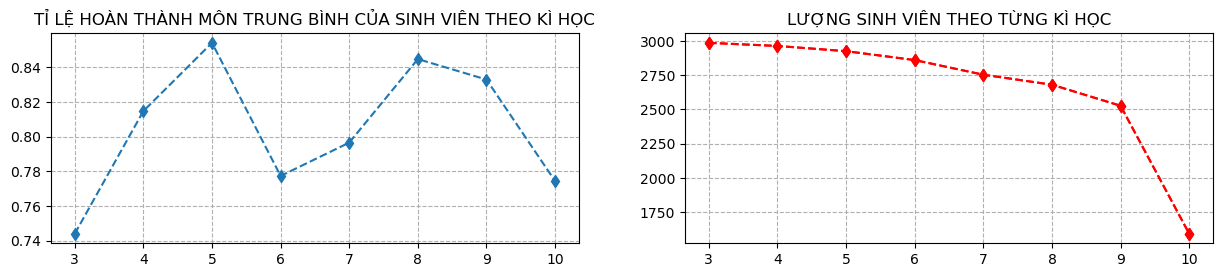

In [32]:
veBieuDo(df_2019)


## Năm 2020

In [34]:
df_2020 = df_full[df_full["NAM_TUYENSINH"] == 2020]
df_2020["HOC_KY"].value_counts()

HOC_KY
HK2 2020-2021    3374
HK1 2020-2021    3366
HK1 2021-2022    3247
HK2 2021-2022    3144
HK1 2022-2023    3061
HK2 2022-2023    2997
HK1 2023-2024    2987
HK2 2023-2024    2799
Name: count, dtype: int64

Tỉ lệ qua môn:
SO_HOC_KY
1    0.745181
2    0.830962
3    0.857700
4    0.797256
5    0.744357
6    0.768426
7    0.820040
8    0.768933
Name: TI_LE_HOAN_THANH, dtype: float64
Lượng sinh viên:
SO_HOC_KY
1    3366
2    3374
3    3247
4    3144
5    3061
6    2997
7    2987
8    2799
Name: TI_LE_HOAN_THANH, dtype: int64
Lượng sinh viên:
SO_HOC_KY
1    3366
2    3374
3    3247
4    3144
5    3061
6    2997
7    2987
8    2799
Name: TI_LE_HOAN_THANH, dtype: int64


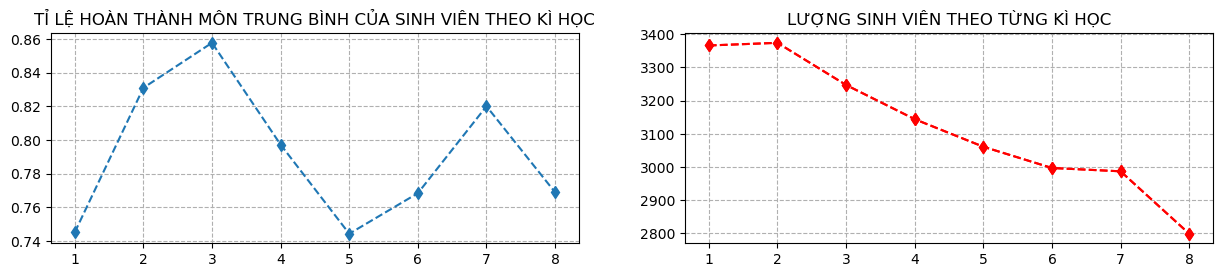

In [35]:
veBieuDo(df_2020)

## Năm 2021

In [37]:
df_2021 = df_full[df_full["NAM_TUYENSINH"] == 2021]
df_2021["HOC_KY"].value_counts()

HOC_KY
HK1 2021-2022    3780
HK2 2021-2022    3748
HK1 2022-2023    3548
HK2 2022-2023    3516
HK1 2023-2024    3425
HK2 2023-2024    3364
Name: count, dtype: int64

Tỉ lệ qua môn:
SO_HOC_KY
1    0.939200
2    0.788930
3    0.792148
4    0.773292
5    0.801261
6    0.815342
Name: TI_LE_HOAN_THANH, dtype: float64
Lượng sinh viên:
SO_HOC_KY
1    3780
2    3748
3    3548
4    3516
5    3425
6    3364
Name: TI_LE_HOAN_THANH, dtype: int64
Lượng sinh viên:
SO_HOC_KY
1    3780
2    3748
3    3548
4    3516
5    3425
6    3364
Name: TI_LE_HOAN_THANH, dtype: int64


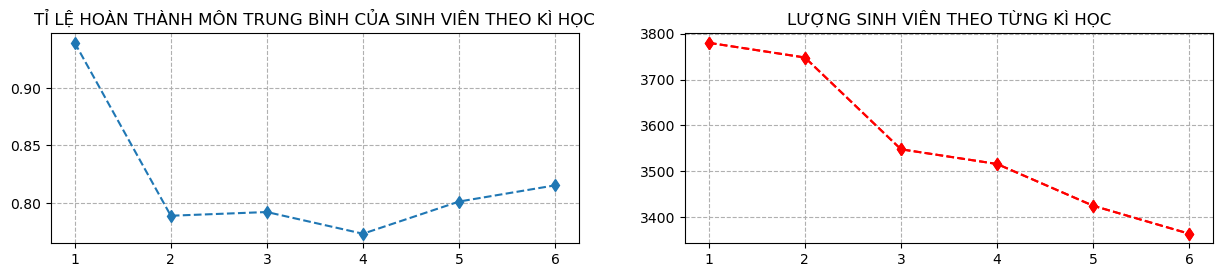

In [38]:
veBieuDo(df_2021)

## Năm 2022

In [40]:
df_2022 = df_full[df_full["NAM_TUYENSINH"] == 2022]
df_2022["HOC_KY"].value_counts()

HOC_KY
HK1 2023-2024    3724
HK1 2022-2023    3571
HK2 2022-2023    3567
HK2 2023-2024    3330
Name: count, dtype: int64

Tỉ lệ qua môn:
SO_HOC_KY
1    0.846278
2    0.771528
3    0.807916
4    0.789890
Name: TI_LE_HOAN_THANH, dtype: float64
Lượng sinh viên:
SO_HOC_KY
1    3571
2    3567
3    3724
4    3330
Name: TI_LE_HOAN_THANH, dtype: int64
Lượng sinh viên:
SO_HOC_KY
1    3571
2    3567
3    3724
4    3330
Name: TI_LE_HOAN_THANH, dtype: int64


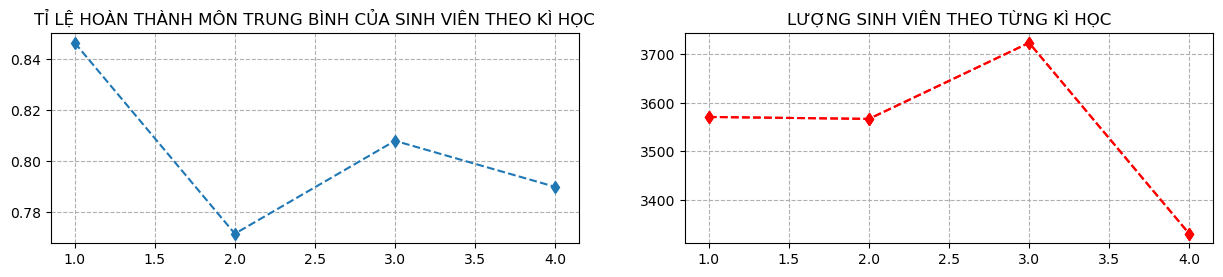

In [41]:
veBieuDo(df_2022)

## Năm 2023

In [43]:
df_2023 = df_full[df_full["NAM_TUYENSINH"] == 2023]
df_2023["HOC_KY"].value_counts()

HOC_KY
HK1 2023-2024    3621
HK2 2023-2024    3504
Name: count, dtype: int64

Tỉ lệ qua môn:
SO_HOC_KY
1    0.811414
2    0.741621
Name: TI_LE_HOAN_THANH, dtype: float64
Lượng sinh viên:
SO_HOC_KY
1    3621
2    3504
Name: TI_LE_HOAN_THANH, dtype: int64
Lượng sinh viên:
SO_HOC_KY
1    3621
2    3504
Name: TI_LE_HOAN_THANH, dtype: int64


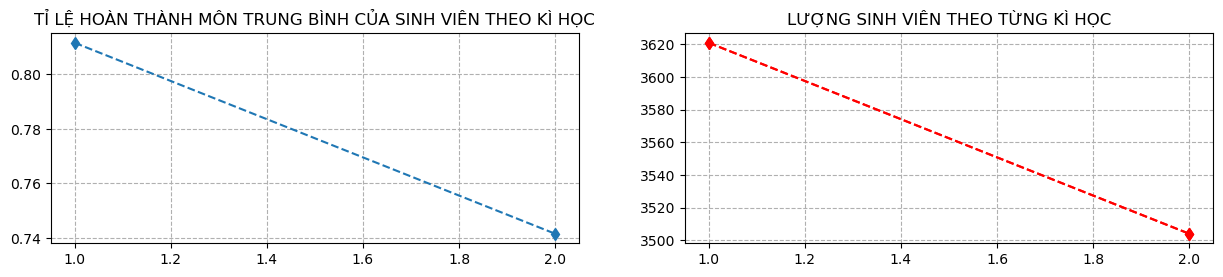

In [44]:
veBieuDo(df_2023)

In [45]:
#Save dataset
df_full.to_csv('Data/Data_All.csv', index=None)

In [46]:
# Save train dataset:  Dữ liệu từ năm học 2020 - 2021 đến hết Học kỳ 1 năm học 2023–2024.
data_train = df_full[df_full["HOC_KY"] != "HK2 2023-2024"]
len(data_train)
data_train.to_csv('Data/Data_Train.csv', index=None)

In [47]:
#Save test dataset: Dữ liệu Học kỳ 2 năm học 2023–2024.
data_test = df_full[df_full["HOC_KY"] == "HK2 2023-2024"]
len(data_test)
data_test.to_csv('Data/Data_Test.csv', index=None)